# Compte rendu Mini projet 3 : Calcul des forces de pression sur une dingue

### Elisa leblond 21302500

## Introduction :

Une digue est un barrage utilisée pour retenir une étendue d'eau pour protéger des infrastructures en zone inondable. Dans ce projet, le but est d'étudier les forces qui s'appliquent sur des digues de 2 formes différentes. On veut aussi comprendre le lien entre le volume de la digue et son état d'équilibre translationnel.

In [24]:
#importation des modules et des bibliothèques nécéssaires pour la réalisation de ce projet 
import numpy as np
import matplotlib.pyplot as plt

## Modélisation :

On souhaite ici afficher les courbes représentant la digue

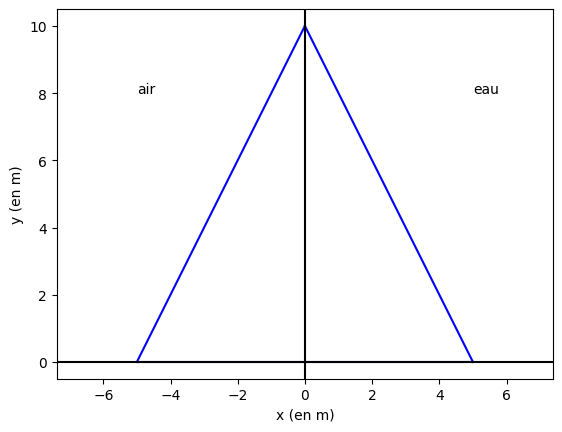

In [27]:
#Paramètres
H = 10
xa = -5
xe = +5

#On définit les différentes fonctions pour les deux côtés de la digue
def fair(y,xi):
    return -(y - H) * xi / H 

def feau(y,xf):
    return  -(y - H) * xf / H   

Y = np.linspace(0, H, 1000)

#On trace le graphique 
plt.plot(fair(Y,xa), Y, '-b') 
plt.plot(feau(Y,xe), Y, '-b') 
 
plt.plot([xe, xa], [0, 0], '-b') # Bas de la digue
plt.xlabel('x (en m)') 
plt.ylabel('y (en m)')
plt.text(xe, 8, 'eau')
plt.text(xa, 8, 'air')

plt.axis('equal') #on obtient un plot centré
plt.axhline(0, color = "black")
plt.axvline(0, color = "black")
plt.xlim(-8, 8)
plt.show()

## Première partie : digues en pentes droites

In [28]:
#nouveaux paramètres
L = 1
g = 9.81
rho_beton = 3000
rho_eau = 1000   #on fait l'hypothèse que l'eau et le béton sont incomprésibles, leurs masses volumiques sont constantes
mu_s = 0.500  # coefficient de frottement roche/béton donné dans l'énoncé

N = 100

### Volume et force gravitationnelle :

On utilise une intégration pour obtenir le volume de la digue

In [29]:
#Calcul du volume par intégration
def integration(f,x_i,x_f,n,var_1):
    delta = (x_f-x_i)/n
    som = 0
    for i in range(n):
        som += (f(x_i + i*delta,var_1) + f(x_i + (i+1)*delta,var_1)) *delta/2 
    return abs(som)

In [30]:
def Volume(A,L):
    #on définit A (aire) et L(longueur) le produit des deux donne bien une longueur 
    return A*L

On calcule ce même volume de manière analytique 

In [31]:

Aire_d = integration(fair,0,H,1000,xa) + integration(feau,0,H,1000,xe)

#Calcul analytique 
Aa = abs(xa*H/2)     
Ae = abs(xe*H/2)    
A_tot = Aa+Ae        
V = abs(A_tot * L)  
 
print("Le Volume de la digue par intégration vaut", Volume(Aire_d ,L), "m^3")
print("Le Volume de la digue analytiquement vaut", V, "m^3")

Le Volume de la digue par intégration vaut 49.999999999999986 m^3
Le Volume de la digue analytiquement vaut 50.0 m^3


On retrouve un résultat similaire avec les deux méthodes. 

On souhaite désormais calculer la force de gravitation exercée sur la digue

In [32]:
F_g = -g*rho_beton*V  
print("la force de gravité exercée sur la digue vaut", F_g, "N  (F_g est selon le vecteur unitaire Uy)")

la force de gravité exercée sur la digue vaut -1471500.0 N  (F_g est selon le vecteur unitaire Uy)


### Forces de pression : 

On intérésse dans cette nouvelle section aux forces de pression. On négligera la pression de l'air sur la digue.  
Ainsi on définit la pression en un point de hauteur y de la digue : $P(y)= \rho_e g (H-y) $

In [33]:

def pression(y,h): #renvoie la pression 
    
    return rho_eau*g*(h-y)

dfeau = -xe/H    # dérivée de la fonction feau (pour une pente droite)
theta = np.arctan(dfeau)  # l'angle  𝜃  entre la tangente en un point et l'axe des abscisses

Ensuite on calcule les composantes infinitésimales de la force de pression selon x et selon y

In [34]:
def dF_pression_ux(y,h): #expression infinitésimale selon x
    
    return (rho_eau*g*(y-h))

def dF_pression_uy(y,x): #pression infinitesimale selon y
    
    return ((rho_eau*g*(y-H)))*(-x/H)

On peut à présent définir l'expression des forces de pression sur les axes x et y.

En effet : 

$$ \vec{F_p} = \int_0^H P(y)\,dl.\vec{n}  = \int_0^H\frac{P(y)}{cos(\theta)}\,dy.(sin(\theta)\vec{u_y}-cos(\theta)\vec{u_x}) =  tan(\theta)\int_0^HP(y)\,dy.\vec{u_y} - \int_0^HP(y)\,dy.\vec{u_x}  = \int_0^HP(y)f'(y)dy. \vec{u_y} - \int_0^HP(y)dy.\vec{u_x} $$
$$ =  -\frac{x_e}{H}\int_0^HP(y)\,dy.\vec{u_y}-\int_0^HP(y)\,dy.\vec{u_x}$$

$$  $$


In [35]:
def F_pression_ux(y,n,var): 
    
    return -integration(dF_pression_ux, 0, y, n,var)     
    
def F_pression_uy(y,n,var):
   
    return -integration(dF_pression_uy, 0, y, n,var)

print("Px =",F_pression_ex(H,100,H),"Pa")
print("Py =",F_pression_ey(H,100,xe),"Pa")


Px = -490500.0 Pa
Py = -245250.0 Pa


### Equilibre translationnel :


D'après le principe fondamental de la dynamique on a : $\sum \vec{F} = \vec{0} \Leftrightarrow \vec{P} + \vec{F} + \vec{R} = \vec{0} $  

On projette sur x puis sur y :  
    
$T = - F_{pression_x}$  

$N =  -F_{pression_y} + mg$

Et on a équilibre translationnel si et seulement si $\frac{|T|}{N}< \mu_s = 0.5 $

In [36]:
def Tangentielle(y,n,var): #définit la composante tangentielle de la réaction du sol
    
    return - F_pression_ex(y,n,var)

def Normale(y,n,volume,var): #définit la composante normale de la réaction du sol
    
    return rho_beton*volume*g - F_pression_ey(y,n,var)

def coeff_frott_stat(y,n,volume,var1,var2): #définit le coefficient de frottement statique
    
    return np.abs(Tangentielle(y,n,var1))/Normale(y,n,volume,var2)

In [37]:
#calcul de T et de N et du rapport T/N
T_frot = Tangentielle(H,N,H)
N_frot =  Normale(H,100,V,xe)
mu = coeff_frott_stat(H,100,V,H,xe)

print("T =",T_frot)
print("N =",N_frot)
print("T/N = {:.3f}".format(mu))

#pour déterminer si l'équilibre est satisfait:
if mu<mu_s :
    print("La digue est stable")
else : 
    print("La digue n'est pas stable")

T = 490500.0
N = 1716750.0
T/N = 0.286
La digue est stable


### Résolution similaire pour une demi-digue côté air:

In [38]:
#dans ce cas xa=-5 et xe = 0
#l'aire de la digue ne comprend plus que la moitié côté air :
Aire = integration(fair,0,H,1000,xa)
V2 = Volume(Aire,L)

# calcul explicite du rapport T/N
mu2 = coeff_frott_stat(H,100,V2,H,0)
print("T/N = {:.3f}".format(mu2))

#pour déterminer si l'équilibre est satisfait:
if mu2<mu_s :
    print("La digue est stable")
else : 
    print("La digue n'est pas stable")

T/N = 0.667
La digue n'est pas stable


### Résolution similaire pour une demi-digue côté eau:

In [39]:
#dans ce cas xa=0 et xe=5
aire = integration(feau,0,H,1000,xe)
V3 = Volume(aire,L)

# calcul explicite du rapport T/N
mu3 = coeff_frott_stat(H,100,V3,H,xe)
print("T/N = {:.3f}".format(mu3))
print("La digue est stable")

T/N = 0.500
La digue est stable


On remarque que pour un même volume, la demi-digue côté air n'est pas stable lorsque la demi-digue côté eau est stable.

## Deuxième partie : les digues convexes 

On change notre hypothèse de départ en considérant que l'interface entre l'eau et le béton n'est plus une fonction affine mais devient une fonction de la forme :

$$
f_{eau} (y)=a \left(\frac{y}{H}\right)^2-(a+x_e)\left(\frac{y}{H}\right) +x_e
$$


On exprime aussi sa dérivée :

$$
f'_{eau} (y)=\frac{2ay}{H^2}-\frac{a+x_e}{H}
$$

Pour la résolution on prendra $a=3$.

On affiche les courbes représentant cette nouvelle digue

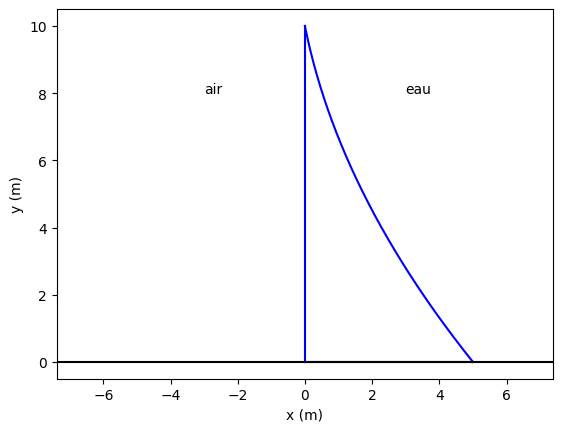

In [40]:
#nouvelles variables 

H = 10
xe = 5
xa = 0
a = 3

#définition des courbes 

def feau_c(y,x): 
    return a * (y / H) ** 2 - (a + x) * (y / H) + x

def fair_c(y,x):
    return (H - y) * x / H

Y = np.linspace(0, H, 1000)

#On affiche le graphique avec le titre et les légendes 
plt.plot(feau_c(Y,xe), Y, '-b')
plt.plot(fair_c(Y,xa), Y, '-b')
plt.plot([xe, xa], [0, 0], '-b')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.text(3, 8, 'eau')
plt.text(-3, 8, 'air')
plt.axis('equal') # Permet d'avoir un plot isométrique
plt.axhline(0, color = "black")
#plt.axvline(0, color = "black")
plt.xlim(-8, 8)
plt.show()

### Equilibre de la digue convexe pour xe=5 :

In [42]:
#dans ce cas xa=0 et xe=5

A1_conv = integration(feau_c,0,H,1000,xe)   #aire de la digue convexe

V_conv = Volume(A1_conv,L)   #volume de la digue
print("Le volume de béton de la digue courbe est de {:.3f}".format(V_conv),"m^3")

# on calcule la résultante des forces de pression sur la digue 
Fp_ux_c = F_pression_ux(H,100,H)
Fp_uy_c = F_pression_uy(H,100,5)
print("Px =",Fp_ux_c,"Pa")
print("py =",Fp_uy_c,"Pa")

#calcul du rapport T/N
mu_c = coeff_frott_stat(H,100,V_conv,H,xe)
print("T/N = {:.3f}".format(mu_c))

#pour déterminer si l'équilibre est satisfait:
if mu_c<mu_s :
    print("La digue est stable")
else : 
    print("La digue n'est pas stable")

Le volume de béton de la digue courbe est de 20.000 m^3
Px = -490500.0 Pa
py = -245250.0 Pa
T/N = 0.588
La digue n'est pas stable


### Equilibre de la digue convexe pour xe=6

In [43]:
#dans ce cas xa=0 et xe=6
xe2 = 6
A2_conv= integration(feau_c,0,H,1000,xe2)   # on définit l'aire de la digue convexe

V2_conv = Volume(A2_conv,L)   #on définit le volume de la digue
print("Le volume de béton de la digue courbe est de {:.3f}".format(V2_conv),"m^3")

#on calcule la résultante des forces de pression sur la digue 
Fp_ux_c = F_pression_ux(H,100,H)
Fp_uy_c = F_pression_uy(H,100,6)
print("Px =",Fp_ux_c,"Pa")
print("py = {:.9}".format(Fp_uy_c),"Pa")

# calcul explicite du rapport T/N
mu2_c = coeff_frott_stat(H,100,V2_conv,H,xe2)
print("T/N = {:.3f}".format(mu2_c))

#pour déterminer si l'équilibre est satisfait:
if mu2_c<mu_s :
    print("La digue est stable")
else : 
    print("La digue n'est pas stable")

Le volume de béton de la digue courbe est de 25.000 m^3
Px = -490500.0 Pa
py = -294300.0 Pa
T/N = 0.476
La digue est stable


Dans le cas où xe = 5, la digue, n'est pas en équilibre translationnel. Au contraire, pour xe = 6, la digue est à l'équilibre translationnel, elle ne va pas glisser. Le deuxième cas xe=6 est donc plus favorable, la digue est satisfaite.

### Limite de l'équilibre statique :

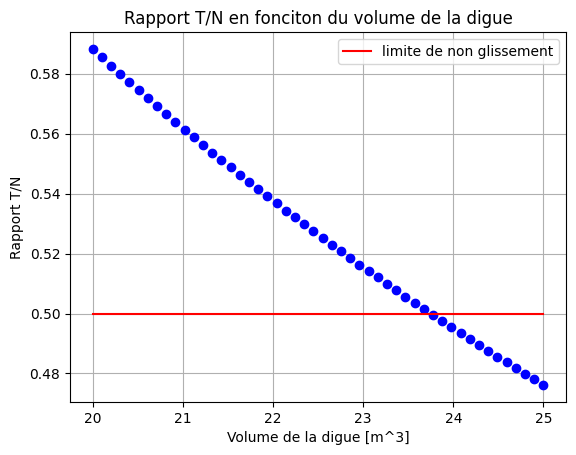

In [50]:
#liste des différentes valeurs de xe 
Xe = np.linspace(5,6,50)

for i in Xe:
    A = integration(feau_c,0,H,1000,i)
    mu = coeff_frott_stat(H,100,A,H,i)
    plt.plot(A,mu,'bo')

plt.plot([20,25],[0.50,0.50],'r',label = 'limite de non glissement')
plt.title("Rapport T/N en fonciton du volume de la digue")
plt.xlabel("Volume de la digue [en m^3]")
plt.ylabel("Rapport T/N")
plt.legend()
plt.grid()

Par lecture graphique, on peut avoir le volume minimum de la digue pour qu'elle soit en équilibre statique qui est de $23,8 m^3$ environ.

In [ ]:
#liste de valeurs de xe 
Xe = np.linspace(4.5,6.5,100)

for i in Xe:
    A = integration(feau_c,0,H,1000,i)
    mu_c = coeff_frott_stat(H,100,A,H,i)
    B = integration(feau,0,H,1000,i)
    mu_d = coeff_frott_stat(H,100,B,H,i)
    plt.plot(A,mu_c,'bo')
    plt.plot(B,mu_d,'ko')

plt.plot([10,30],[0.50,0.50],'r',label = 'limite de non glissement')
plt.title("Rapport T/N en fonciton du volume de la digue")
plt.xlabel("Volume de la digue [m^3]")
plt.ylabel("T/N")
plt.xlim(20,27)
plt.ylim(0.45,0.55)
plt.legend(["Digue convexe", "Digue affine"])
plt.grid()